In [1]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt

In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [3]:
train

,date,store,item,sales
0,2013-01-01,1,1,13
1,2013-01-02,1,1,11
2,2013-01-03,1,1,14
3,2013-01-04,1,1,13
4,2013-01-05,1,1,10
...,...,...,...,...
912995,2017-12-27,10,50,63
912996,2017-12-28,10,50,59
912997,2017-12-29,10,50,74
912998,2017-12-30,10,50,62


In [4]:
test

,id,date,store,item
0,0,2018-01-01,1,1
1,1,2018-01-02,1,1
2,2,2018-01-03,1,1
3,3,2018-01-04,1,1
4,4,2018-01-05,1,1
...,...,...,...,...
44995,44995,2018-03-27,10,50
44996,44996,2018-03-28,10,50
44997,44997,2018-03-29,10,50
44998,44998,2018-03-30,10,50


### 1. Add Date Features

In [5]:
def date_features(df):
    df['date'] = pd.to_datetime(df['date'])
    df['year'] = df.date.dt.year
    df['month'] = df.date.dt.month
    df['day'] = df.date.dt.day
    df['dayofyear'] = df.date.dt.dayofyear
    df['dayofweek'] = df.date.dt.dayofweek
    df['weekofyear'] = df.date.dt.isocalendar().week
    df['day^year'] = np.log((np.log(df['dayofyear'] + 1)) ** (df['year'] - 2000))
    df.drop('date', axis = 1, inplace = True)
    return df

In [6]:
train, test = date_features(train), date_features(test)

In [7]:
train

,store,item,sales,year,month,day,dayofyear,dayofweek,weekofyear,day^year
0,1,1,13,2013,1,1,1,1,1,-4.764668
1,1,1,11,2013,1,2,2,2,1,1.222622
2,1,1,14,2013,1,3,3,3,1,4.246245
3,1,1,13,2013,1,4,4,4,1,6.186505
4,1,1,10,2013,1,5,5,5,1,7.581575
...,...,...,...,...,...,...,...,...,...,...
912995,10,50,63,2017,12,27,361,2,52,30.150097
912996,10,50,59,2017,12,28,362,3,52,30.158055
912997,10,50,74,2017,12,29,363,4,52,30.165987
912998,10,50,62,2017,12,30,364,5,52,30.173894


In [8]:
test

,id,store,item,year,month,day,dayofyear,dayofweek,weekofyear,day^year
0,0,1,1,2018,1,1,1,0,1,-6.597233
1,1,1,1,2018,1,2,2,1,1,1.692861
2,2,1,1,2018,1,3,3,2,1,5.879417
3,3,1,1,2018,1,4,4,3,1,8.565930
4,4,1,1,2018,1,5,5,4,1,10.497565
...,...,...,...,...,...,...,...,...,...,...
44995,44995,10,50,2018,3,27,86,1,13,26.936506
44996,44996,10,50,2018,3,28,87,2,13,26.982511
44997,44997,10,50,2018,3,29,88,3,13,27.027881
44998,44998,10,50,2018,3,30,89,4,13,27.072632


### 2. Daily, Monthly Average for Train

In [9]:
train['daily_avg'] = train.groupby(['item', 'store', 'dayofweek'])['sales'].transform('mean')
train['monthly_avg'] = train.groupby(['item', 'store', 'month'])['sales'].transform('mean')
train = train.dropna()
train

,store,item,sales,year,month,day,dayofyear,dayofweek,weekofyear,day^year,daily_avg,monthly_avg
0,1,1,13,2013,1,1,1,1,1,-4.764668,18.168582,13.709677
1,1,1,11,2013,1,2,2,2,1,1.222622,18.793103,13.709677
2,1,1,14,2013,1,3,3,3,1,4.246245,19.452107,13.709677
3,1,1,13,2013,1,4,4,4,1,6.186505,21.015326,13.709677
4,1,1,10,2013,1,5,5,5,1,7.581575,22.973180,13.709677
...,...,...,...,...,...,...,...,...,...,...,...,...
912995,10,50,63,2017,12,27,361,2,52,30.150097,68.823755,56.283871
912996,10,50,59,2017,12,28,362,3,52,30.158055,73.532567,56.283871
912997,10,50,74,2017,12,29,363,4,52,30.165987,78.275862,56.283871
912998,10,50,62,2017,12,30,364,5,52,30.173894,82.854406,56.283871


In [10]:
daily_avg = train.groupby(['item', 'store', 'dayofweek'])['sales'].mean().reset_index()
daily_avg.head(20)

,item,store,dayofweek,sales
0,1,1,0,15.584615
1,1,1,1,18.168582
2,1,1,2,18.793103
3,1,1,3,19.452107
4,1,1,4,21.015326
5,1,1,5,22.973180
6,1,1,6,23.796935
7,1,2,0,22.815385
8,1,2,1,25.835249
9,1,2,2,25.432950


In [11]:
monthly_avg = train.groupby(['item', 'store', 'month'])['sales'].mean().reset_index()
monthly_avg.head(20)

,item,store,month,sales
0,1,1,1,13.709677
1,1,1,2,14.631206
2,1,1,3,17.600000
3,1,1,4,20.786667
4,1,1,5,22.245161
5,1,1,6,24.833333
6,1,1,7,25.967742
7,1,1,8,22.529032
8,1,1,9,21.386667
9,1,1,10,19.645161


### 3. Add daily, monthly averages to test and rolling averages

In [12]:
# Merge test set with daily avg, monthly avg
def merge(df1, df2, col, col_name):
    df1 = pd.merge(df1, df2, how = 'left', on = None, left_on = col, 
                   right_on = col, left_index = False, right_index = False, 
                   sort = True, copy = True, indicator = False)
    df1 = df1.rename(columns = {'sales': col_name})
    return df1

In [13]:
test = merge(test, daily_avg, ['item', 'store', 'dayofweek'], 'daily_avg')
test = merge(test, monthly_avg, ['item', 'store', 'month'], 'monthly_avg')
test

,id,store,item,year,month,day,dayofyear,dayofweek,weekofyear,day^year,daily_avg,monthly_avg
0,0,1,1,2018,1,1,1,0,1,-6.597233,15.584615,13.709677
1,7,1,1,2018,1,8,8,0,2,14.169510,15.584615,13.709677
2,14,1,1,2018,1,15,15,0,3,18.356066,15.584615,13.709677
3,21,1,1,2018,1,22,22,0,4,20.570163,15.584615,13.709677
4,28,1,1,2018,1,29,29,0,5,22.034296,15.584615,13.709677
...,...,...,...,...,...,...,...,...,...,...,...,...
44995,44999,10,50,2018,3,31,90,5,13,27.116779,82.854406,67.780645
44996,44972,10,50,2018,3,4,63,6,9,25.654438,87.984674,67.780645
44997,44979,10,50,2018,3,11,70,6,10,26.098165,87.984674,67.780645
44998,44986,10,50,2018,3,18,77,6,11,26.490904,87.984674,67.780645


In [14]:
# Sales Rolling mean sequence per item
rolling_10 = train.groupby(['item'])['sales'].rolling(10).mean().reset_index().drop('level_1', axis = 1)
train['rolling_mean'] = rolling_10['sales']
train.head(20)

,store,item,sales,year,month,day,dayofyear,dayofweek,weekofyear,day^year,daily_avg,monthly_avg,rolling_mean
0,1,1,13,2013,1,1,1,1,1,-4.764668,18.168582,13.709677,NaN
1,1,1,11,2013,1,2,2,2,1,1.222622,18.793103,13.709677,NaN
2,1,1,14,2013,1,3,3,3,1,4.246245,19.452107,13.709677,NaN
3,1,1,13,2013,1,4,4,4,1,6.186505,21.015326,13.709677,NaN
4,1,1,10,2013,1,5,5,5,1,7.581575,22.973180,13.709677,NaN
5,1,1,12,2013,1,6,6,6,1,8.654488,23.796935,13.709677,NaN
6,1,1,10,2013,1,7,7,0,2,9.517292,15.584615,13.709677,NaN
7,1,1,9,2013,1,8,8,1,2,10.233535,18.168582,13.709677,NaN
8,1,1,12,2013,1,9,9,2,2,10.842422,18.793103,13.709677,NaN
9,1,1,9,2013,1,10,10,3,2,11.369688,19.452107,13.709677,11.3


In [15]:
# Add 90 last days of training rolling mean sequence to test data
rolling_last90 = train.groupby(['item', 'store'])['rolling_mean'].tail(90).copy()
test['rolling_mean'] = rolling_last90.reset_index().drop('index', axis = 1)
test.head(50)

,id,store,item,year,month,day,dayofyear,dayofweek,weekofyear,day^year,daily_avg,monthly_avg,rolling_mean
0,0,1,1,2018,1,1,1,0,1,-6.597233,15.584615,13.709677,21.5
1,7,1,1,2018,1,8,8,0,2,14.169510,15.584615,13.709677,20.6
2,14,1,1,2018,1,15,15,0,3,18.356066,15.584615,13.709677,21.2
3,21,1,1,2018,1,22,22,0,4,20.570163,15.584615,13.709677,21.3
4,28,1,1,2018,1,29,29,0,5,22.034296,15.584615,13.709677,20.8
5,1,1,1,2018,1,2,2,1,1,1.692861,18.168582,13.709677,20.4
6,8,1,1,2018,1,9,9,1,2,15.012584,18.168582,13.709677,18.5
7,15,1,1,2018,1,16,16,1,3,18.745407,18.168582,13.709677,17.8
8,22,1,1,2018,1,23,23,1,4,20.812842,18.168582,13.709677,17.1
9,29,1,1,2018,1,30,30,1,5,22.206997,18.168582,13.709677,18.3


In [16]:
# Shift rolling mean 3 months
train['rolling_mean'] = train.groupby(['item'])['rolling_mean'].shift(90)
train.head()

,store,item,sales,year,month,day,dayofyear,dayofweek,weekofyear,day^year,daily_avg,monthly_avg,rolling_mean
0,1,1,13,2013,1,1,1,1,1,-4.764668,18.168582,13.709677,NaN
1,1,1,11,2013,1,2,2,2,1,1.222622,18.793103,13.709677,NaN
2,1,1,14,2013,1,3,3,3,1,4.246245,19.452107,13.709677,NaN
3,1,1,13,2013,1,4,4,4,1,6.186505,21.015326,13.709677,NaN
4,1,1,10,2013,1,5,5,5,1,7.581575,22.973180,13.709677,NaN


### 4. Check correlation using heatmap

<AxesSubplot:>

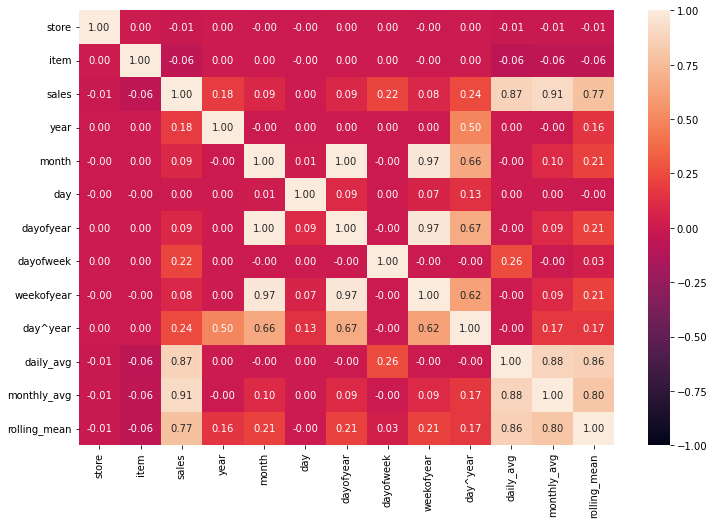

In [17]:
f = plt.figure(figsize=(12, 8))
sb.heatmap(train.corr(), vmin = -1, vmax = 1, annot = True, fmt=".2f")

> montly_avg has the highest correlation with sales, we will keep it and remove other features.

### 5a. Clean features

In [18]:
for df in [train, test]:
    df.drop(['dayofyear', 'weekofyear', 'daily_avg', 
             'day', 'month', 'item', 'store',], 
           axis = 1, inplace = True)

### 5b. Feature scaling

In [19]:
sales_series, id_series = train['sales'], test['id']

train = (train - train.mean()) / train.std()
test = (test - test.mean()) / test.std()

# Restore actual sales to train and actual id to test
train['sales'] = sales_series
test['id'] = id_series

### 5c. Train-test split

In [20]:
# Training data
X_train = train.drop('sales', axis = 1).dropna()
y_train = train['sales']

# Test data
test.sort_values(by = ['id'], inplace = True)
X_test = test.drop('id', axis = 1)

df_train = train.copy()

In [21]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df_train.drop('sales',axis=1),df_train.pop('sales'), test_size = 0.2, random_state = 0)

### 6. XGBoost Model

In [25]:
import xgboost as xgb
matrix_train = xgb.DMatrix(X_train, label = y_train)
matrix_test = xgb.DMatrix(X_test, label = y_test)

In [26]:
model = xgb.train(params = {'objective': 'reg:linear', 'eval_metric': 'mae'},
                 dtrain = matrix_train, num_boost_round = 500,
                 early_stopping_rounds = 20, evals = [(matrix_test, 'test')])

[11:13:43] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[0]	test-mae:36.24220
[1]	test-mae:25.38948
[2]	test-mae:17.86263
[3]	test-mae:12.78555
[4]	test-mae:9.56807
[5]	test-mae:7.68842
[6]	test-mae:6.66559
[7]	test-mae:6.13267
[8]	test-mae:5.86315
[9]	test-mae:5.72962
[10]	test-mae:5.66353
[11]	test-mae:5.63068
[12]	test-mae:5.61423
[13]	test-mae:5.60568
[14]	test-mae:5.60186
[15]	test-mae:5.59927
[16]	test-mae:5.59735
[17]	test-mae:5.59650
[18]	test-mae:5.59590
[19]	test-mae:5.59576
[20]	test-mae:5.59491
[21]	test-mae:5.59387
[22]	test-mae:5.59387
[23]	test-mae:5.59340
[24]	test-mae:5.59254
[25]	test-mae:5.59209
[26]	test-mae:5.59219
[27]	test-mae:5.59161
[28]	test-mae:5.59171
[29]	test-mae:5.59117
[30]	test-mae:5.59124
[31]	test-mae:5.59142
[32]	test-mae:5.59100
[33]	test-mae:5.59076
[34]	test-mae:5.59078
[35]	test-mae:5.59086
[36]	test-mae:5.59093
[37]	test-mae:5

> Based on this prediction model, we'll build a simulation model to improve demand planning for store replenishment.

## Demand Planning:
### a) Rolling Mean of previous sales. 
1. Calculate average sales for the last p days: 
2. Apply this mean to forecast day n, day n+1, day n+2
3. Forecast demand = Forecast_day_n + Forecast_day_n+1 + Forecast_day_n+2
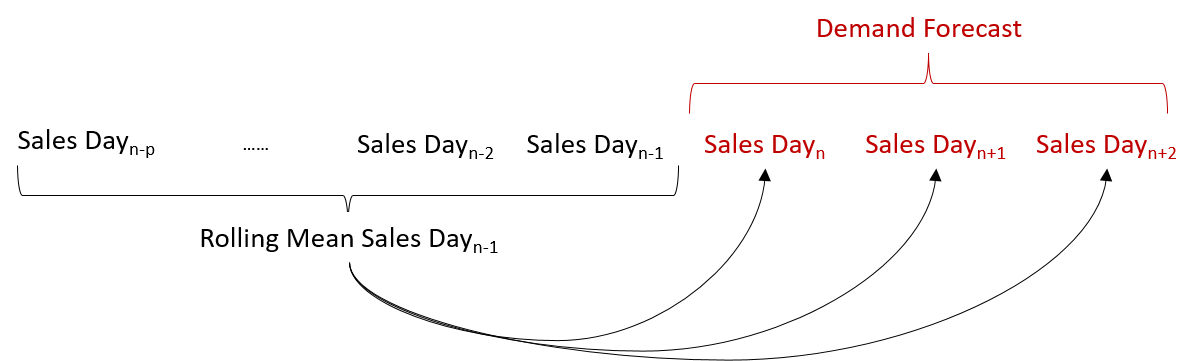

In [29]:
def roll_mean(df_sales, n_days):
    df_roll = df_sales.rolling(n_days).mean().round(0)
    return df_roll.dropna()

### b) XGBoost

In [31]:
def forecastxgb_sum_n(df_fcst, n_window, rolling_ndays):
    df_ft3n = df_fcst.rolling(window = n_window).sum().shift(-2)
    df_ft3n = df_ft3n.iloc[rolling_ndays-1:]
    return df_ft3n

def forecast_sum_n(df_roll, n_window):
    return df_roll * n_window

def actual_sum_p(df_sales, days_p):
    df_act_p = df_sales.rolling(window = days_p).sum().shift(-(days_p-1))
    return df_act_p

### Evaluate accuracy of both forecasting methods by:
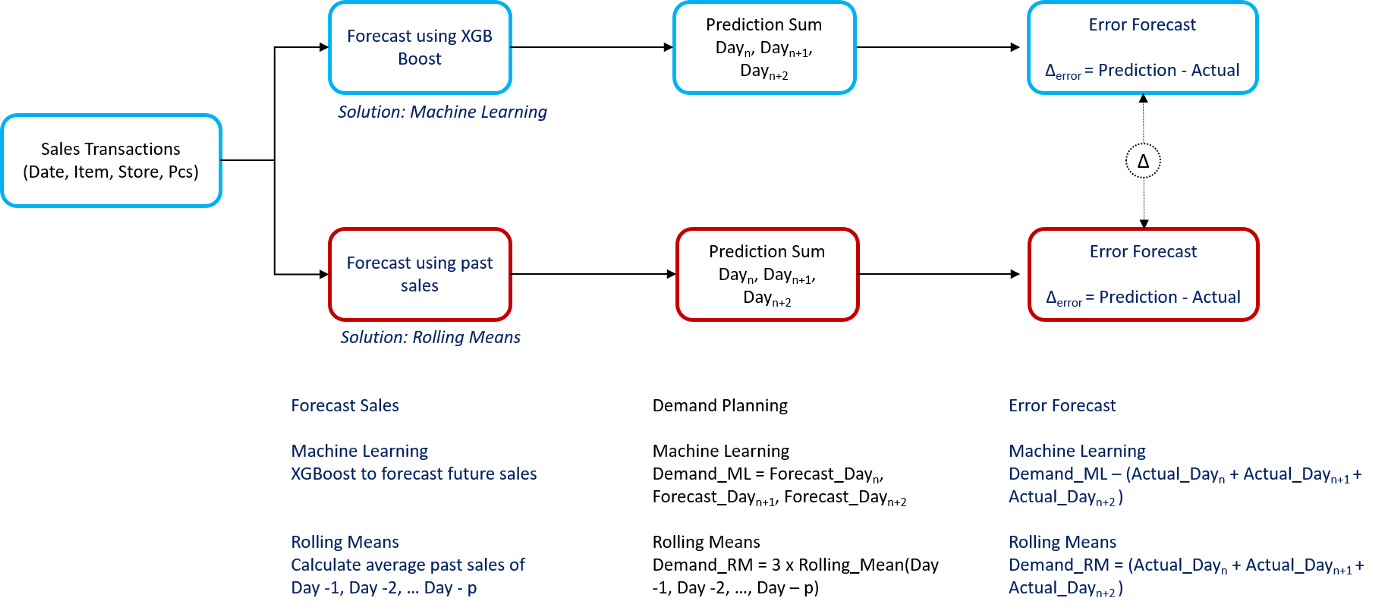

### a. Parameter tuning: Rolling Mean for p days
Before comparing rolling mean results with XGBoost, let's try finding the best value for p to get the best performance.

In [32]:
def error_calc(df_sales, df_fcst, df_roll, rolling_ndays, frcst_n_days):
    # Rolling means
    df_roll = roll_mean(df_sales, rolling_ndays)
    
    # Sum of the forecast sales of the next n days
    df_ft_n = forecastxgb_sum_n(df_fcst, frcst_n_days, rolling_ndays)
    
    # Sum of the rolling mean sales of the next n days
    df_rm_n = forecastrm_sum_n(df_roll, frcst_n_days)
    
    # Calculate delta forecast
    delta_ft, delta_rm, delta_ft_n, df_sales_n, delta_rm_n, delta_rm_max, delta_ft_max = delta_frcst(df_sales, df_ft_n, df_rm_n, 
                                                                                         frcst_n_days, rolling_ndays)
    return delta_ft_n, df_sales_n, delta_rm_n, delta_rm_max, delta_ft_max, df_ft_n, df_rm_n

## Conclusion

Using the rolling mean method for demand forecasting, we could reduce forecast error by 35% and find the best parameter p days.

However, we could get even better performance by replacing the rolling mean by XGBoost forecast to predict day n, day n+1, day n+2 and reduce error by 32%.